In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

using CSV, DelimitedFiles, DataFrames, JLD

## Combinatorial Laplacian with random graphs

ER graph

least eigenvalue of Laplacian: 0.0009999999999034778
method: 

DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

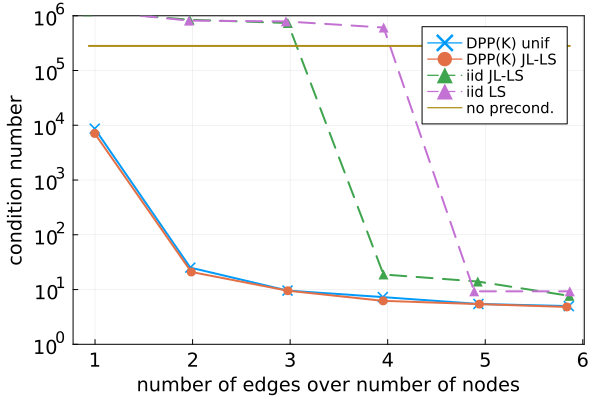

iid LS

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

In [50]:
rng = Random.default_rng()

# connection graph parameters
n = 300
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

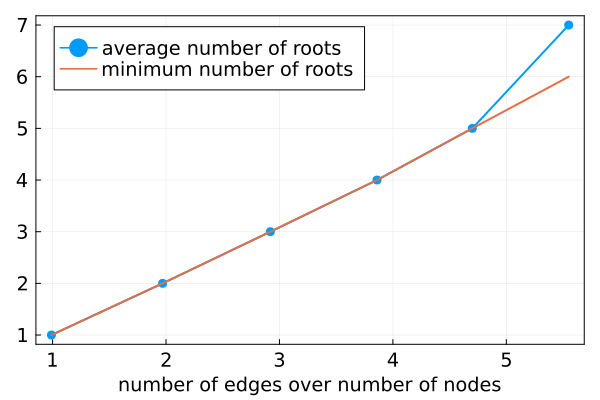

In [6]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

 SBM graph

In [4]:
rng = Random.default_rng()

# graph parameters
# c = [100 0.01 ;
# 0.01 20]

c = [100 0.01 ;
0.01 100]
n = [1000 ; 1000]
#n = [100, 100]

# regularization parameter
q = 0.001 #0.1

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
#D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

print("is connected: ", is_connected(g))

# print least eigenvalues
# B = sp_magnetic_incidence(meta_g)
# l = power_method_least_eigenvalue(B' * B)
# println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    #"iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"SBM"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e10)#(1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

is connected: true

In [62]:
D_results["DPP(K) unif"]

Dict{String, Any} with 20 entries:
  "cdL"             => 49467.2
  "sparsity_L"      => [1999.0, 36300.0, 61252.0, 80811.0, 93833.0, 104399.0]
  "time_lev_ust"    => 0
  "roots"           => [1.0, 3.0, 3.0, 6.0, 7.0, 8.0]
  "cnd_std"         => [NaN, NaN, NaN, NaN, NaN, NaN]
  "connected"       => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  "time_lev_ust_JL" => 0
  "sparsity_L_std"  => [NaN, NaN, NaN, NaN, NaN, NaN]
  "timing_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "time_lev"        => 0
  "timing"          => [0.0417109, 0.0746777, 0.235189, 0.160888, 0.0767433, 0.…
  "roots_std"       => [NaN, NaN, NaN, NaN, NaN, NaN]
  "pc_edges"        => [0.0996211, 0.185979, 0.262066, 0.32489, 0.386119, 0.434…
  "cycles"          => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  "m"               => 10028
  "time_lev_JL"     => 4.37795
  "pc_edges_std"    => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cycles_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cnd"             => [39567.2, 100.986, 53.7247, 32.1948, 27.5451, 27.2

In [ ]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

## Magnetic Laplacian with random graphs

MUN graph model

method: DPP(K) unif

method: DPP(K) JL-LS

method: iid JL-LS

method: ST JL-LS

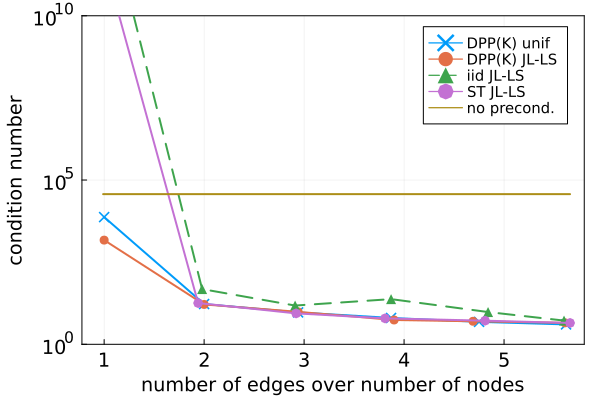

In [2]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-2

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
_, l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    "ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e10)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


ERO graph model

method: DPP(K) unif

method: DPP(K) JL-LS

method: iid JL-LS

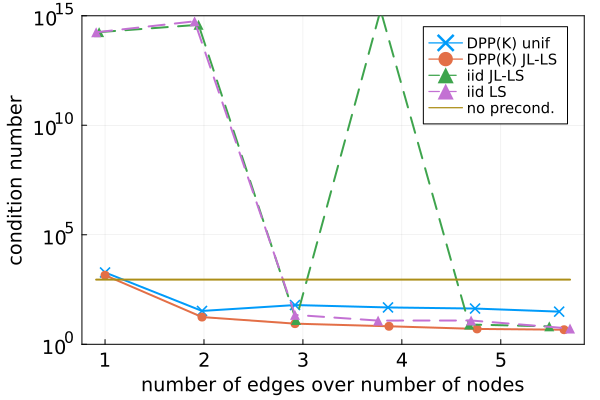

method: iid LS

In [3]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1#10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
_, l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    "iid LS",
    #"ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [12]:
batch = 2
m = 10
ind_rd = rand(1:m, batch)

2-element Vector{Int64}:
 9
 3

In [18]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [19]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

SystemError: SystemError: opening file "polblogs.gml": No such file or directory

In [ ]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

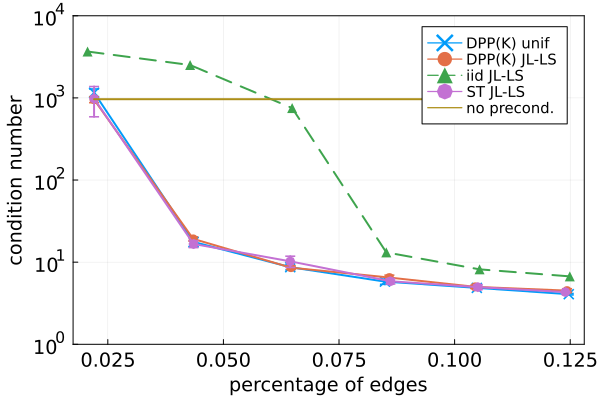

In [13]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

Sparse random graphs

connected graph generated with m/n = 20.06
least eigenvalue of Laplacian: 

0.0012458491156700261


method: DPP(K) unif

method: DPP(K) JL-LS

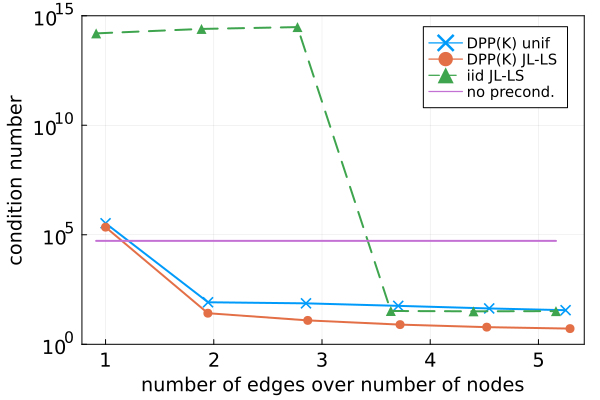

method: iid JL-LS

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

In [8]:

rng = Random.default_rng()

# connection graph parameters

# number of edges / number of nodes
sparsity_meta_g = 20 

# number of nodes 
n = 3000
# probability that edge e is present
p = 2*sparsity_meta_g/n

# type of graph

# eta = 1e-2
# type = "MUN" # fine for 200 nodes

eta = 1e-5 #  0.2*1e-3
type = "ERO" 

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model CHECKING if CONNECTED
meta_g = MetaGraph(n)
ic = false
while !ic
    if type=="MUN"
        meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
    elseif type=="ERO"
        meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
    end
    ic = is_connected(meta_g)
end
println("connected graph generated with m/n = ", ne(meta_g) / nv(meta_g))

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

In [4]:
[t_DPP t_iid]

6×2 Matrix{Float64}:
 0.476068  0.502803
 0.140759  0.102028
 0.251994  0.0544246
 0.149706  0.0596823
 0.186449  0.0919807
 0.236326  0.0867143

In [5]:
D_DPP

Dict{String, Any} with 20 entries:
  "cdL"             => 15024.4
  "sparsity_L"      => [4041.0, 176718.0, 355579.0, 492120.0, 612921.0, 696569.…
  "time_lev_ust"    => 0
  "roots"           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  "cnd_std"         => [NaN, NaN, NaN, NaN, NaN, NaN]
  "connected"       => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  "time_lev_ust_JL" => 0
  "sparsity_L_std"  => [NaN, NaN, NaN, NaN, NaN, NaN]
  "timing_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "time_lev"        => 0
  "timing"          => [0.476068, 0.140759, 0.251994, 0.149706, 0.186449, 0.236…
  "roots_std"       => [NaN, NaN, NaN, NaN, NaN, NaN]
  "pc_edges"        => [0.0998502, 0.189216, 0.270494, 0.341737, 0.40654, 0.463…
  "cycles"          => [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
  "m"               => 20030
  "time_lev_JL"     => 28.6532
  "pc_edges_std"    => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cycles_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cnd"             => [1.65949e5, 25.2932, 12.0991, 8.26418, 6.80547,

In [27]:
C = cholesky(Hermitian(spL))
R = sparse(C.L)[invperm(C.p), :]


100×100 SparseMatrixCSC{ComplexF64, Int64} with 781 stored entries:
⠠⠀⠀⡀⡀⣀⠀⠀⣀⡀⠀⠀⠁⠒⠒⠀⠀⣀⡀⠀⠀⠀⠀⠀⠀⠄⢠⡄⠠⠤⣄⣀⣀⣀⣀⣀⣀⣀⣀⣀
⠀⠀⠀⠀⠀⠂⠀⠀⠀⡀⠉⠀⠀⠀⠀⠀⠀⠀⠀⠤⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠤⠤⠤⠀⠄⠤⠀⠒⠀⢀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠁⠉⠁⠀⠉⠀⡄⠀⠂⠀⠉⠁⠀⠀⠀⠀⠀⠀⠨⠀⠁⠀⠀⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀
⠂⡀⠀⠀⠀⠀⠀⠤⠄⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠒⠀⠐⠂⠤⠀⠀⠀⠒⠀⠀⠀⠀⠈⠭⠝⠋⠁⠈⠀⠀⠀⠀⢀⠀⠀⠀⠁⠉⠉⠉⠀⠀⠀⠀⠀⠀⠀⠀
⠠⡤⠀⠀⠀⠀⠂⠠⠀⠀⠤⠠⠈⠀⠉⠀⠉⠤⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠤⠤⠤⠄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡀⠀⠁⠀⠀⠀⠀⠠⠤⠀⠀⠀⠀⠀⠀⠀⠀⠒⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡂⠀⠀⠀⠤⠄⠀⡀⠀⠀⠀⡀⢀⠁⢀⣀⡀⠀⠀⠀⠀⢠⢤⠀⠀⠀⠀⠀⢀⣀⣀⠀⠀⠀⠀⠀⠀⠀
⡀⠀⠀⢀⡀⠀⠀⡈⣉⡉⠀⠀⠀⠠⠄⠑⠉⣉⡁⢀⠀⠀⠤⠄⢀⠀⠀⠀⠈⢉⣉⣉⣉⡀⠀⠀⠀⠀⠀⠀
⠀⣀⠠⠁⠄⠀⠐⠀⠀⠖⠀⠀⠀⠀⠀⠄⠤⠤⠄⠀⠀⠀⠀⠄⠀⠀⠠⠄⠀⠀⠤⠤⠤⠤⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠂⠀⠀⠀⠀⢂⠂⣀⠒⠀⠀⠀⠐⣒⡂⣁⠀⠀⠀⠂⠀⠀⠀⡠⠄⠐⣒⣒⣒⣒⣂⠀⠀⠀⠀⠀
⠒⠀⠀⠀⠐⠀⠐⠂⠐⠊⠀⠒⠀⠀⠒⠐⠒⠛⠓⠒⠈⠈⠀⠀⠚⢀⢉⡡⠀⠀⠙⠛⠛⠛⠛⠒⠀⠀⠀⠀
⠀⠀⠀⠀⠐⠀⠀⡀⠀⠁⠀⠈⠀⠀⠀⠀⠀⠉⠉⠀⠐⠒⠁⠁⠀⠀⠉⠁⠠⠀⠉⠉⠉⠉⠉⠉⠁⠀⠀⠀
⠀⠀⢀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠐⠂⠈⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢀⡀⠀⠀⠒⠀⡀⢐⡂⠀⠀⠀⠤⢀⠀⢀⣒⠂⠀⠀⠀⠐⠊⠐⠀⠐⠂⠀⠀⠒⠒⠒⠒⠒⠒⠒⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡀⡀⢀⡀⠐⠐⠀⠀⠀⠀⠀⣒⡂⠒⢀⣐⠐⡂⠔⠀⠀⠀⠈⠙⢒⣒⣒⣒⣒⣒⣒⣂⠀⠀
⠀⠀⠒⠀⠀⠀⠀⠀⠀⠂⠀⠄⠀⠀⠀⠀⠀⠒⠂⠀⢀⠒⠀⠀⠈⠉⠀⠁⠀⠛⠛⠒⠒⠒⠒⠒⠒⠒⠂⠀
⠀⠩⠂⠊⠋⠐⠀⠔⠾⣏⢀⢀⠀⢀⣀⠔⢶⡿⠇⠀⠀⠀⠐⠂⠀⠀⠀⠀⠀⠀⠐⠶⠶⠶⠶⠶⠶⠶⠶⠀
⠀⠈⠀⠀⠐⠒⠐⠒⠒⠀⠀⠀⠬⠀⠀⠀⠈⠉⠁⡀⠉⠈⠀⠀⠀⠀⠀⠀⠒⠂⠉⠉⠉⠉⠉⠉⠉⠉⠉⠁

In [34]:
C = cholesky(Hermitian(spL))
R = sparse(C.L)[invperm(C.p), :]
T = Matrix(R) \ Matrix(Lap)
pcL = Matrix(R) \ (T')

100×100 Matrix{ComplexF64}:
     1.67323-0.0im          …  -0.00604593-0.000223189im
         0.0-0.0im              -0.0411202+0.0528954im
         0.0-0.0im             -0.00408185+0.0106368im
         0.0-0.0im             -0.00949679-0.024155im
         0.0+0.0im              -0.0378589-0.0422847im
         0.0+0.0im          …     0.023243+0.0140035im
 -0.00434127-0.0983294im        -0.0448081-0.108698im
         0.0-0.0im               0.0332344-0.0356964im
         0.0+0.0im               -0.323628-0.0510227im
         0.0-0.0im               -0.281258-0.151242im
            ⋮               ⋱  
   0.0387776-0.068157im          0.0145309+0.00167214im
  -0.0293885-0.0519767im          0.141051+0.0963541im
 0.000917857+0.0130971im         0.0149072+0.028136im
    -0.11181+0.0767845im           0.17746-0.278095im
  -0.0224484+0.008001im     …    -0.108152+0.135308im
   0.0258046+0.0363845im         0.0709201+0.00966908im
   -0.033339-0.0234511im        -0.0560338-0.0409793im
  -0.06